In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

In [23]:
def upload_and_parse_dates(file_path):
    # Load the CSV file and parse the 'Date' column in DD/MM/YYYY format without time
    df = pd.read_csv(file_path, parse_dates=['Date'])
    df = df.sort_values(by='Date', ascending=True)  # Sort by date in ascending order
    for col in df.columns:
        if col !="Date":
            df[col]=pd.to_numeric(df[col],errors="coerce")
    return df

In [24]:
btc_data=upload_and_parse_dates("bitcoin_historical_data_cleaned.csv")
sp500_data=upload_and_parse_dates("sp500_historical_data_cleaned.csv")
gold_data=upload_and_parse_dates("gold_historical_data_cleaned.csv")

In [25]:
#Statistique descriptive 
btc_data.describe()


,Date,Close,High,Low,Open,Volume
count,2232,2232.000000,2232.000000,2232.000000,2232.000000,2.232000e+03
mean,2022-01-20 12:00:00,32720.074108,33397.097056,31939.574220,32680.525314,3.085689e+10
min,2019-01-01 00:00:00,3399.470000,3427.950000,3391.020000,3401.380000,4.324201e+09
25%,2020-07-11 18:00:00,10689.750000,10896.460000,10447.137500,10677.445000,1.803917e+10
50%,2022-01-20 12:00:00,27794.805000,28305.765000,27245.495000,27781.830000,2.703812e+10
75%,2023-08-01 06:00:00,47286.945000,48476.105000,46444.472500,47291.032500,3.818185e+10
max,2025-02-09 00:00:00,106146.270000,109114.880000,105291.730000,106147.300000,3.509679e+11
std,NaN,23705.349337,24194.384984,23145.630811,23677.004904,1.946871e+10


In [26]:
sp500_data.describe()

,Date,Close,High,Low,Open,Volume
count,1535,1535.000000,1535.000000,1535.000000,1535.000000,1.535000e+03
mean,2022-01-18 01:26:18.371335168,4066.804645,4088.892397,4041.517055,4065.902456,4.246306e+09
min,2019-01-02 00:00:00,2237.400000,2300.730000,2191.860000,2290.710000,1.296530e+09
25%,2020-07-11 12:00:00,3288.710000,3305.885000,3269.920000,3286.915000,3.635455e+09
50%,2022-01-18 00:00:00,4101.230000,4129.480000,4072.560000,4095.410000,4.007510e+09
75%,2023-07-29 12:00:00,4536.645000,4558.390000,4516.745000,4540.705000,4.584180e+09
max,2025-02-07 00:00:00,6118.710000,6128.180000,6088.740000,6121.430000,9.976520e+09
std,NaN,892.126701,893.743214,890.620427,892.322155,1.021286e+09


In [27]:
gold_data.describe()

,Date,Close,High,Low,Open,Volume
count,1537,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,2022-01-19 11:33:17.918022144,1865.045153,1873.867599,1855.907092,1864.692908,4762.395576
min,2019-01-02 00:00:00,1269.300000,1269.800000,1266.000000,1266.400000,0.000000
25%,2020-07-13 00:00:00,1709.900000,1717.400000,1699.000000,1707.400000,63.000000
50%,2022-01-19 00:00:00,1831.900000,1841.200000,1822.000000,1830.100000,219.000000
75%,2023-08-01 00:00:00,1968.400000,1977.700000,1960.300000,1968.100000,651.000000
max,2025-02-07 00:00:00,2871.600000,2889.500000,2857.800000,2865.200000,346362.000000
std,NaN,338.518799,340.086340,336.423897,338.051482,26010.089351


In [28]:
#Verification valeurs manquantes 
btc_data.isnull().sum()


Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [29]:
sp500_data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [30]:
gold_data.isnull().sum()




Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [31]:
btc_data.dtypes        

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

In [32]:
sp500_data.dtypes  

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

In [33]:
gold_data.dtypes  

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

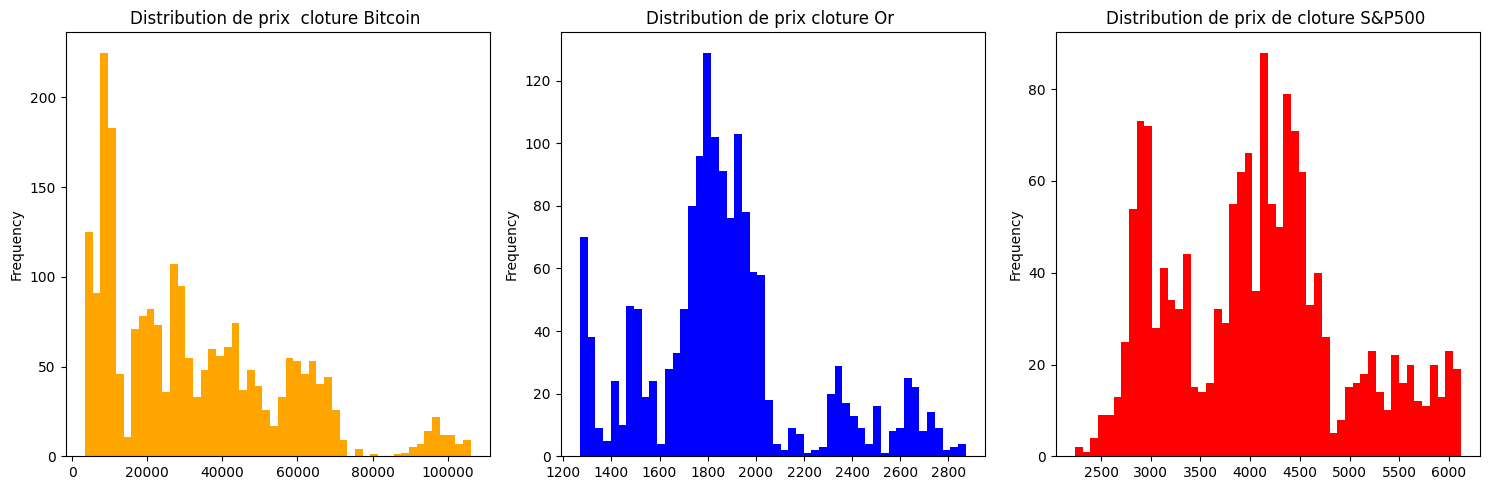

In [34]:
#Visualisation des distribution des prix de cloture 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
btc_data['Close'].plot(kind='hist' , bins=50 , color='orange',title='Distribution de prix  cloture Bitcoin ')
plt.subplot(1,3,2)
gold_data['Close'].plot(kind='hist' , bins=50 , color='blue',title='Distribution de prix cloture Or ')
plt.subplot(1,3,3)
sp500_data['Close'].plot(kind='hist' , bins=50 , color='red',title='Distribution de prix de cloture S&P500 ')
plt.tight_layout()
plt.show()

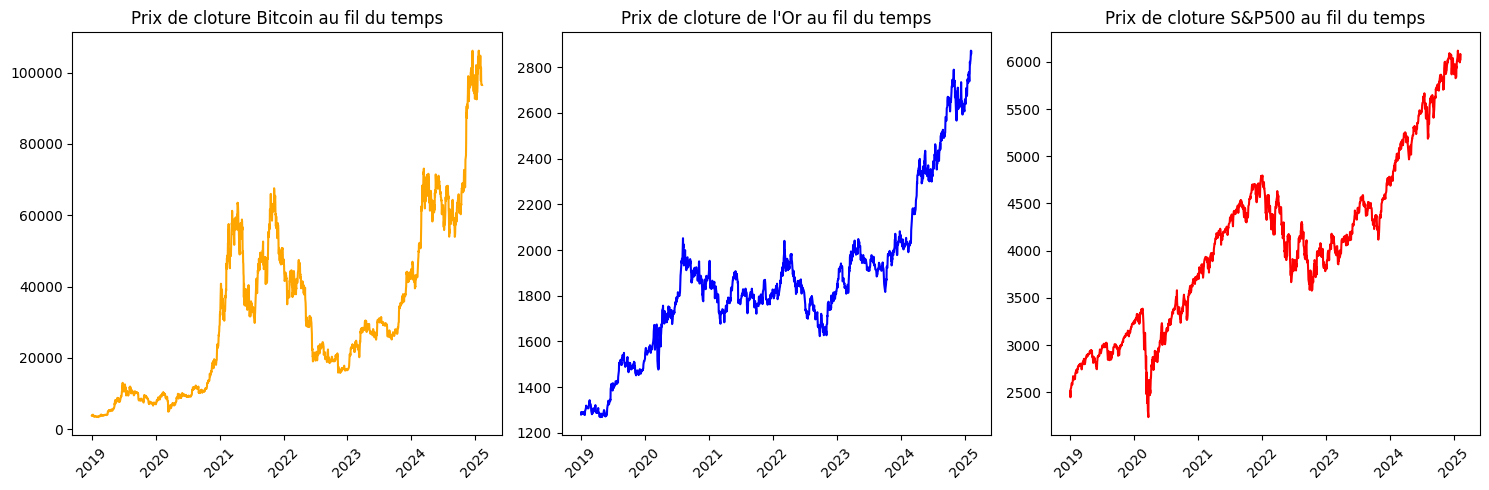

In [35]:
#Verification de l'evolution des prix de cloture au fil du temps
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(btc_data['Date'], btc_data['Close'], color='orange')
plt.title('Prix de cloture Bitcoin au fil du temps')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.plot(gold_data['Date'], gold_data['Close'], color='blue')
plt.title("Prix de cloture de l'Or au fil du temps")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.plot(sp500_data['Date'], sp500_data['Close'], color='red')
plt.title('Prix de cloture S&P500 au fil du temps')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [36]:
btc_data.corr()
gold_data.corr()
sp500_data.corr()

,Date,Close,High,Low,Open,Volume
Date,1.000000,0.904753,0.906627,0.902973,0.904684,-0.059337
Close,0.904753,1.000000,0.999570,0.999645,0.999212,-0.119162
High,0.906627,0.999570,1.000000,0.999442,0.999709,-0.109107
Low,0.902973,0.999645,0.999442,1.000000,0.999564,-0.127304
Open,0.904684,0.999212,0.999709,0.999564,1.000000,-0.115896
Volume,-0.059337,-0.119162,-0.109107,-0.127304,-0.115896,1.000000


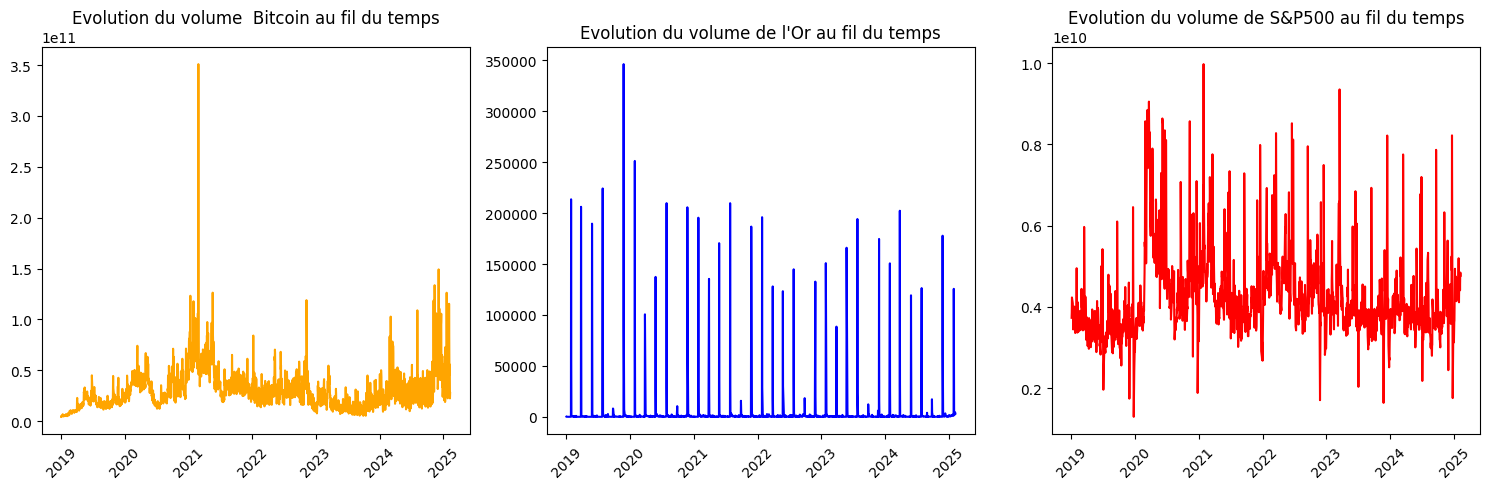

In [37]:
#Verification de l'evolution des prix de cloture au fil du temps
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(btc_data['Date'], btc_data['Volume'], color='orange')
plt.title('Evolution du volume  Bitcoin au fil du temps')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.plot(gold_data['Date'], gold_data['Volume'], color='blue')
plt.title("Evolution du volume de l'Or au fil du temps")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.plot(sp500_data['Date'], sp500_data['Volume'], color='red')
plt.title('Evolution du volume de S&P500 au fil du temps')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


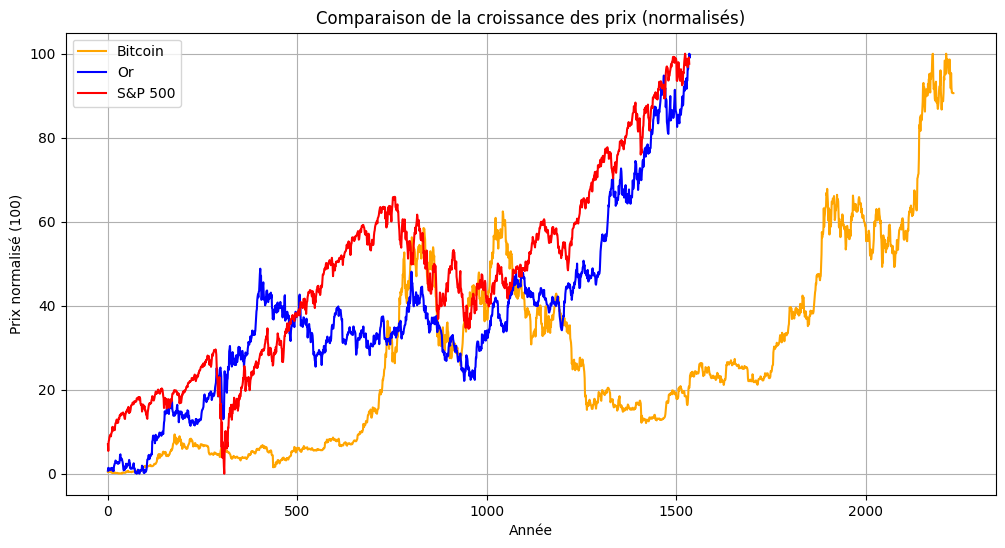

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Fonction de normalisation (Mettre tous les prix entre 0 et 1)
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())*100

# Normaliser les prix de clôture pour les 3 actifs
btc_data["Close_Norm"] = normalize(btc_data, "Close")
gold_data["Close_Norm"] = normalize(gold_data, "Close")
sp500_data["Close_Norm"] = normalize(sp500_data, "Close")

# Affichage du graphique comparatif
plt.figure(figsize=(12, 6))

plt.plot(btc_data.index, btc_data["Close_Norm"], color="orange", label="Bitcoin")
plt.plot(gold_data.index, gold_data["Close_Norm"], color="blue", label="Or")
plt.plot(sp500_data.index, sp500_data["Close_Norm"], color="red", label="S&P 500")

plt.title("Comparaison de la croissance des prix (normalisés)")
plt.xlabel("Année")
plt.ylabel("Prix normalisé (100)")
plt.legend()
plt.grid()

plt.show()
